# NFL Predictions

## University of Denver Data Analytics Bootcamp

### August 7, 2019

**Presenters:**

* Tai Johnson
* Seth Oliver
* Matthew Stewart

## Test

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [74]:
import warnings
warnings.filterwarnings('ignore')

In [159]:
def prep_confusion_visual(dataframe, width, height, subplot_nums, model_name, title):
    names = dataframe.columns
    fig = plt.figure(figsize=(width,height))
    ax = fig.add_subplot(subplot_nums)
    cax = ax.matshow(dataframe, cmap=plt.get_cmap('autumn'))
    fig.colorbar(cax)
    
    ticks = np.arange(0,len(dataframe.columns),1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(dataframe.columns, rotation = 90, fontsize = 10)
    ax.set_yticklabels(dataframe.columns, fontsize = 10)

    if model_name == deep_model:
        score = "{:.2%}".format(deep_model_accuracy)
    else:    
        score = "{:.2%}".format(model_name.score(X_test_scaled, y_test))

    plt.title(f'''
    {title}

    Score: {score}
    ''', y=1.12, fontsize = 16, fontweight='bold')
    plt.xlabel('Actual', fontweight='bold', fontsize = 14)
    ax.xaxis.set_label_position('top')
    plt.ylabel('Predicted', fontweight='bold', fontsize = 14)

    for i in range(len(dataframe.columns)):
        for j in range(len(dataframe.columns)):
            text = ax.text(j, i, dataframe.iloc[i, j],
                           ha="center", va="center", color="black", fontsize = 14)

In [75]:
games = pd.read_csv('Resources/nfl_data_with_final_win_percentages_plus_opp.csv')
games.head()

,Game ID,schedule_date,schedule_season,schedule_week,schedule_week_clean,schedule_playoff,team,team_id,cumulative_win_percent,cum_win_25,...,weather_wind_mph,wind_below_15,wind_GTE_15,win_lose_draw,stadium,stadium_surface,weather_humidity,weather_detail,vegas_success,vegas_success_rate
0,1,9/2/1966,1966,1,1,False,Miami Dolphins,MIA,0.5,0,...,6.0,1,0,1,Orange Bowl,0,71,NaN,NaN,0.660162
1,1,9/2/1966,1966,1,1,False,Oakland Raiders,OAK,0.5,0,...,6.0,1,0,0,Orange Bowl,0,71,NaN,NaN,NaN
2,2,9/3/1966,1966,1,1,False,Denver Broncos,DEN,0.5,0,...,7.0,1,0,1,Rice Stadium,Grass,70,NaN,NaN,NaN
3,2,9/3/1966,1966,1,1,False,Houston Oilers,TEN,0.5,0,...,7.0,1,0,0,Rice Stadium,Grass,70,NaN,NaN,NaN
4,3,9/4/1966,1966,1,1,False,Buffalo Bills,BUF,0.5,0,...,7.0,1,0,1,Balboa Stadium,Grass,82,NaN,NaN,NaN


In [76]:
games_train = games[(games['schedule_season'] >= 2009) & (games['schedule_season'] <= 2016)]

In [77]:
games_test = games[games['schedule_season'] >= 2017]

In [78]:
games_train_filtered = games_train[[
    'cumulative_win_percent',
    'opp_win_percent',
    'Miami Dolphins',
    'Oakland Raiders',
#     'Houston Oilers',
    'Denver Broncos',
    'San Diego Chargers',
    'Buffalo Bills',
    'Green Bay Packers',
#     'Baltimore Colts',
    'Atlanta Falcons',
#     'Los Angeles Rams',
    'Detroit Lions',
    'Chicago Bears',
    'Pittsburgh Steelers',
    'New York Giants',
    'San Francisco 49ers',
    'Minnesota Vikings',
#     'St. Louis Cardinals',
    'Philadelphia Eagles',
    'Washington Redskins',
    'Cleveland Browns',
    'New York Jets',
    'New England Patriots',
    'Kansas City Chiefs',
    'Dallas Cowboys',
#     'Boston Patriots',
    'New Orleans Saints',
    'Cincinnati Bengals',
    'Tampa Bay Buccaneers',
    'Seattle Seahawks',
#     'Los Angeles Raiders',
    'Indianapolis Colts',
#     'Phoenix Cardinals',
    'Arizona Cardinals',
    'Carolina Panthers',
    'St. Louis Rams',
    'Jacksonville Jaguars',
    'Baltimore Ravens',
#     'Tennessee Oilers',
    'Tennessee Titans',
    'Houston Texans',
#     'Los Angeles Chargers',
    'Home',
    'Away',
    'Favorite_to_Win',
    'Favorite_to_Lose',
    'spread_favorite_clean',
    'stadium_indoors',
    'stadium_outdoors',
    'stadium_retractable',
    'stadium_neutral_true',
    'stadium_neutral_false',
    'temp_below_32',
    'temp_32_to_80',
    'temp_above_80',
    'wind_below_15',
    'wind_GTE_15',
    'win_lose_draw'    
]]
games_train_filtered.head()

,cumulative_win_percent,opp_win_percent,Miami Dolphins,Oakland Raiders,Denver Broncos,San Diego Chargers,Buffalo Bills,Green Bay Packers,Atlanta Falcons,Detroit Lions,...,stadium_outdoors,stadium_retractable,stadium_neutral_true,stadium_neutral_false,temp_below_32,temp_32_to_80,temp_above_80,wind_below_15,wind_GTE_15,win_lose_draw
19482,0.5,0.5,0,0,0,0,0,0,0,0,...,1.0,0.0,0,1,0,1,0,1,0,0
19483,0.5,0.5,0,0,0,0,0,0,0,0,...,1.0,0.0,0,1,0,1,0,1,0,1
19484,0.5,0.5,0,0,0,0,0,0,0,0,...,0.0,1.0,0,1,0,1,0,1,0,1
19485,0.5,0.5,0,0,0,0,0,0,0,0,...,0.0,1.0,0,1,0,1,0,1,0,0
19486,0.5,0.5,0,0,0,0,0,0,1,0,...,0.0,0.0,0,1,0,1,0,1,0,0


In [79]:
games_test_filtered = games_test[[
    'cumulative_win_percent',
    'opp_win_percent',
    'Miami Dolphins',
    'Oakland Raiders',
#     'Houston Oilers',
    'Denver Broncos',
    'San Diego Chargers',
    'Buffalo Bills',
    'Green Bay Packers',
#     'Baltimore Colts',
    'Atlanta Falcons',
#     'Los Angeles Rams',
    'Detroit Lions',
    'Chicago Bears',
    'Pittsburgh Steelers',
    'New York Giants',
    'San Francisco 49ers',
    'Minnesota Vikings',
#     'St. Louis Cardinals',
    'Philadelphia Eagles',
    'Washington Redskins',
    'Cleveland Browns',
    'New York Jets',
    'New England Patriots',
    'Kansas City Chiefs',
    'Dallas Cowboys',
#     'Boston Patriots',
    'New Orleans Saints',
    'Cincinnati Bengals',
    'Tampa Bay Buccaneers',
    'Seattle Seahawks',
#     'Los Angeles Raiders',
    'Indianapolis Colts',
#     'Phoenix Cardinals',
    'Arizona Cardinals',
    'Carolina Panthers',
    'St. Louis Rams',
    'Jacksonville Jaguars',
    'Baltimore Ravens',
#     'Tennessee Oilers',
    'Tennessee Titans',
    'Houston Texans',
#     'Los Angeles Chargers',
    'Home',
    'Away',
    'Favorite_to_Win',
    'Favorite_to_Lose',
    'spread_favorite_clean',
    'stadium_indoors',
    'stadium_outdoors',
    'stadium_retractable',
    'stadium_neutral_true',
    'stadium_neutral_false',
    'temp_below_32',
    'temp_32_to_80',
    'temp_above_80',
    'wind_below_15',
    'wind_GTE_15',
    'win_lose_draw'    
]]
games_test_filtered.head()

,cumulative_win_percent,opp_win_percent,Miami Dolphins,Oakland Raiders,Denver Broncos,San Diego Chargers,Buffalo Bills,Green Bay Packers,Atlanta Falcons,Detroit Lions,...,stadium_outdoors,stadium_retractable,stadium_neutral_true,stadium_neutral_false,temp_below_32,temp_32_to_80,temp_above_80,wind_below_15,wind_GTE_15,win_lose_draw
23754,0.5,0.5,0,0,0,0,0,0,0,0,...,1.0,0.0,0,1,0,1,0,1,0,0
23755,0.5,0.5,0,0,0,0,0,0,0,0,...,1.0,0.0,0,1,0,1,0,1,0,1
23756,0.5,0.5,0,0,0,0,1,0,0,0,...,1.0,0.0,0,1,0,1,0,1,0,0
23757,0.5,0.5,0,0,0,0,0,0,0,0,...,1.0,0.0,0,1,0,1,0,1,0,1
23758,0.5,0.5,0,0,0,0,0,0,1,0,...,1.0,0.0,0,1,0,1,0,1,0,0


In [80]:
games_train_filtered.dropna(inplace=True)
games_train_filtered.head(20)

,cumulative_win_percent,opp_win_percent,Miami Dolphins,Oakland Raiders,Denver Broncos,San Diego Chargers,Buffalo Bills,Green Bay Packers,Atlanta Falcons,Detroit Lions,...,stadium_outdoors,stadium_retractable,stadium_neutral_true,stadium_neutral_false,temp_below_32,temp_32_to_80,temp_above_80,wind_below_15,wind_GTE_15,win_lose_draw
19482,0.5,0.5,0,0,0,0,0,0,0,0,...,1.0,0.0,0,1,0,1,0,1,0,0
19483,0.5,0.5,0,0,0,0,0,0,0,0,...,1.0,0.0,0,1,0,1,0,1,0,1
19484,0.5,0.5,0,0,0,0,0,0,0,0,...,0.0,1.0,0,1,0,1,0,1,0,1
19485,0.5,0.5,0,0,0,0,0,0,0,0,...,0.0,1.0,0,1,0,1,0,1,0,0
19486,0.5,0.5,0,0,0,0,0,0,1,0,...,0.0,0.0,0,1,0,1,0,1,0,0
19487,0.5,0.5,1,0,0,0,0,0,0,0,...,0.0,0.0,0,1,0,1,0,1,0,1
19488,0.5,0.5,0,0,0,0,0,0,0,0,...,1.0,0.0,0,1,0,1,0,1,0,0
19489,0.5,0.5,0,0,0,0,0,0,0,0,...,1.0,0.0,0,1,0,1,0,1,0,1
19490,0.5,0.5,0,0,0,0,0,0,0,0,...,1.0,0.0,0,1,0,1,0,1,0,1
19491,0.5,0.5,0,0,0,0,0,0,0,0,...,1.0,0.0,0,1,0,1,0,1,0,0


In [81]:
games_test_filtered.dropna(inplace=True)
games_test_filtered.head(20)

,cumulative_win_percent,opp_win_percent,Miami Dolphins,Oakland Raiders,Denver Broncos,San Diego Chargers,Buffalo Bills,Green Bay Packers,Atlanta Falcons,Detroit Lions,...,stadium_outdoors,stadium_retractable,stadium_neutral_true,stadium_neutral_false,temp_below_32,temp_32_to_80,temp_above_80,wind_below_15,wind_GTE_15,win_lose_draw
23754,0.5,0.5,0,0,0,0,0,0,0,0,...,1.0,0.0,0,1,0,1,0,1,0,0
23755,0.5,0.5,0,0,0,0,0,0,0,0,...,1.0,0.0,0,1,0,1,0,1,0,1
23756,0.5,0.5,0,0,0,0,1,0,0,0,...,1.0,0.0,0,1,0,1,0,1,0,0
23757,0.5,0.5,0,0,0,0,0,0,0,0,...,1.0,0.0,0,1,0,1,0,1,0,1
23758,0.5,0.5,0,0,0,0,0,0,1,0,...,1.0,0.0,0,1,0,1,0,1,0,0
23759,0.5,0.5,0,0,0,0,0,0,0,0,...,1.0,0.0,0,1,0,1,0,1,0,1
23760,0.5,0.5,0,0,0,0,0,0,0,0,...,1.0,0.0,0,1,0,1,0,1,0,0
23761,0.5,0.5,0,0,0,0,0,0,0,0,...,1.0,0.0,0,1,0,1,0,1,0,1
23762,0.5,0.5,0,0,0,0,0,0,0,0,...,1.0,0.0,0,1,0,1,0,1,0,1
23763,0.5,0.5,0,0,0,0,0,0,0,0,...,1.0,0.0,0,1,0,1,0,1,0,0


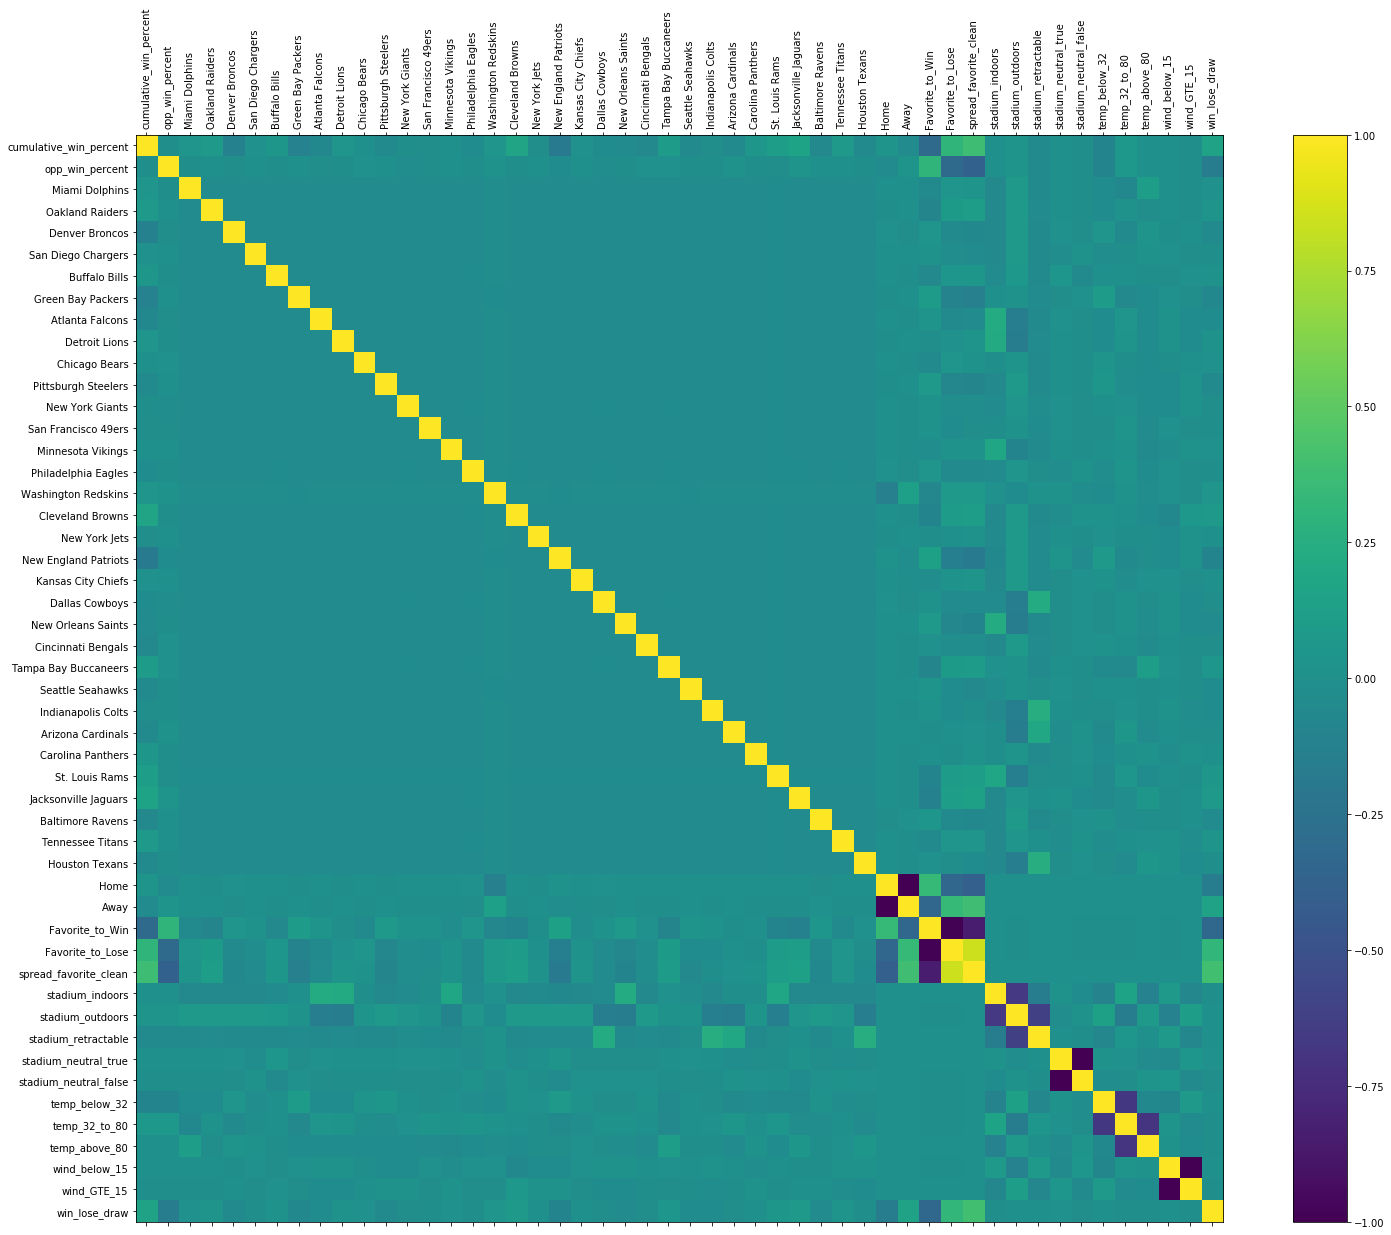

In [82]:
names = games_train_filtered.columns[:-1]
correlations = games_train_filtered.corr()
zoom_in_on_columns = ['Away', 'Home', 'Favorite_to_Win']
simpler_correlations = correlations.loc[zoom_in_on_columns, zoom_in_on_columns]
# correlations = simpler_correlations
fig = plt.figure(figsize = [25,20])
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(correlations.columns),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(correlations.columns, rotation = 90)
ax.set_yticklabels(correlations.columns)
plt.show()

In [83]:
X_train = games_train_filtered.drop("win_lose_draw", axis=1)
y_train = games_train_filtered["win_lose_draw"].values.reshape(-1, 1)
print(X_train.shape, y_train.shape)

(4140, 49) (4140, 1)


In [84]:
X_test = games_test_filtered.drop("win_lose_draw", axis=1)
y_test = games_test_filtered["win_lose_draw"].values.reshape(-1, 1)
print(X_test.shape, y_test.shape)

(1004, 49) (1004, 1)


In [85]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [86]:
# Create a logistic regression model

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [87]:
classifier.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [88]:
print(f'Logistic Regression score on train data is {classifier.score(X_train_scaled, y_train)}')
print(f'Logistic Regression score on test data is {classifier.score(X_test_scaled, y_test)}')

Logistic Regression score on train data is 0.6620772946859903
Logistic Regression score on test data is 0.6703187250996016


In [89]:
X_train_no_vegas = X_train.drop(['Favorite_to_Win', 'Favorite_to_Lose', 'spread_favorite_clean'], axis=1)
X_train_no_vegas.shape

(4140, 46)

In [90]:
X_test_no_vegas = X_test.drop(['Favorite_to_Win', 'Favorite_to_Lose', 'spread_favorite_clean'], axis=1)
X_test_no_vegas.shape

(1004, 46)

In [91]:
X_scaler_no_vegas = MinMaxScaler().fit(X_train_no_vegas)
X_train_no_vegas_scaled = X_scaler_no_vegas.transform(X_train_no_vegas)
X_test_no_vegas_scaled = X_scaler_no_vegas.transform(X_test_no_vegas)

In [92]:
classifier_no_vegas = LogisticRegression()
classifier_no_vegas

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [93]:
classifier_no_vegas.fit(X_train_no_vegas_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [94]:
print(f'Logistic Regression score on train data (no Vegas) is {classifier_no_vegas.score(X_train_no_vegas_scaled, y_train)}')
print(f'Logistic Regression score on test data (no Vegas) is {classifier_no_vegas.score(X_test_no_vegas_scaled, y_test)}')

Logistic Regression score on train data (no Vegas) is 0.628743961352657
Logistic Regression score on test data (no Vegas) is 0.6105577689243028


In [95]:
logistic_predictions = classifier.predict(X_test_scaled)

In [96]:
logistic_accuracy = pd.DataFrame({"Prediction": list(logistic_predictions), "Actual": y_test.ravel()}).reset_index(drop=True)
logistic_accuracy['Correct'] = logistic_accuracy.Prediction == logistic_accuracy.Actual
logistic_accuracy.head(15)

,Prediction,Actual,Correct
0,1,0,False
1,0,1,False
2,0,0,True
3,1,1,True
4,0,0,True
5,1,1,True
6,1,0,False
7,0,1,False
8,1,1,True
9,0,0,True


In [97]:
logistic_y_actu = pd.Series(y_test.ravel(), name='Actual')
logistic_y_pred = pd.Series(logistic_predictions, name='Predicted')
logistic_df_confusion = pd.crosstab(logistic_y_actu, logistic_y_pred)

In [98]:
logistic_df_confusion.columns = ['Win', 'Lose']

In [99]:
logistic_df_confusion.rename(index={
    logistic_df_confusion.index[0]: 'Win',
    logistic_df_confusion.index[1]: 'Lose',
    logistic_df_confusion.index[2]: 'Draw'
}, inplace=True)
logistic_df_confusion['Draw'] = 0
logistic_df_confusion

,Win,Lose,Draw
Actual,,,
Win,330,170,0
Lose,157,343,0
Draw,2,2,0


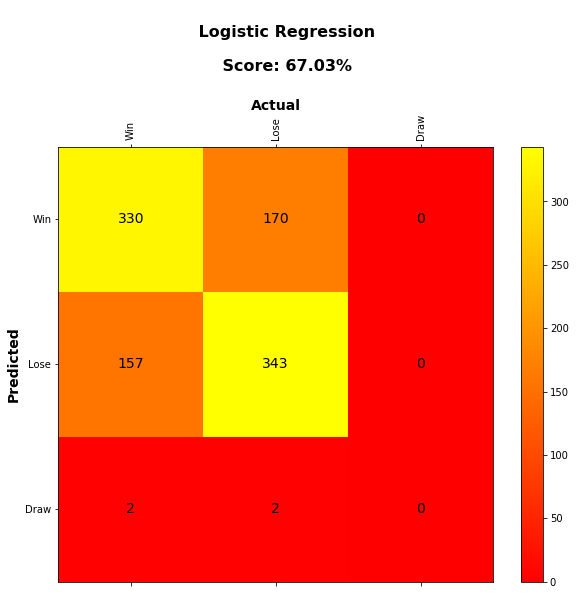

In [160]:
prep_confusion_visual(logistic_df_confusion, 10, 8, 111, classifier, 'Logistic Regression')
plt.show()

In [23]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [24]:
print(f'SVM score on train data is {svm_model.score(X_train_scaled, y_train)}')
print(f'SVM score on test data is {svm_model.score(X_test_scaled, y_test)}')

SVM score on train data is 0.6618357487922706
SVM score on test data is 0.6723107569721115


In [25]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [1, 5, 10],
    'gamma': [0.0001, 0.001, 0.01]
}
grid = GridSearchCV(svm_model, param_grid, verbose = 3)

In [26]:
grid.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... C=1, gamma=0.0001, score=0.6642547033285094, total=   0.8s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV] ...... C=1, gamma=0.0001, score=0.6613488034807832, total=   0.8s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.8s remaining:    0.0s


[CV] ...... C=1, gamma=0.0001, score=0.6598984771573604, total=   0.8s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.6642547033285094, total=   0.7s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.6613488034807832, total=   0.8s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.6598984771573604, total=   0.8s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.6642547033285094, total=   0.8s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.6613488034807832, total=   0.6s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.6598984771573604, total=   0.8s
[CV] C=5, gamma=0.0001 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   41.0s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [27]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'gamma': 0.0001}
0.6618357487922706


In [28]:
svm_predictions = svm_model.predict(X_test_scaled)

In [29]:
svm_accuracy = pd.DataFrame({"Prediction": list(svm_predictions), "Actual": y_test.ravel()}).reset_index(drop=True)
svm_accuracy['Correct'] = svm_accuracy.Prediction == svm_accuracy.Actual
svm_accuracy.head(15)

,Prediction,Actual,Correct
0,1,0,False
1,0,1,False
2,0,0,True
3,1,1,True
4,0,0,True
5,1,1,True
6,1,0,False
7,0,1,False
8,1,1,True
9,0,0,True


In [30]:
svm_y_actu = pd.Series(y_test.ravel(), name='Actual')
svm_y_pred = pd.Series(svm_predictions, name='Predicted')
svm_df_confusion = pd.crosstab(svm_y_actu, svm_y_pred)

In [31]:
svm_df_confusion.columns = ['Win', 'Lose']

In [32]:
svm_df_confusion.rename(index={
    svm_df_confusion.index[0]: 'Win',
    svm_df_confusion.index[1]: 'Lose',
    svm_df_confusion.index[2]: 'Draw'
}, inplace=True)
svm_df_confusion['Draw'] = 0
svm_df_confusion

,Win,Lose,Draw
Actual,,,
Win,337,163,0
Lose,162,338,0
Draw,2,2,0


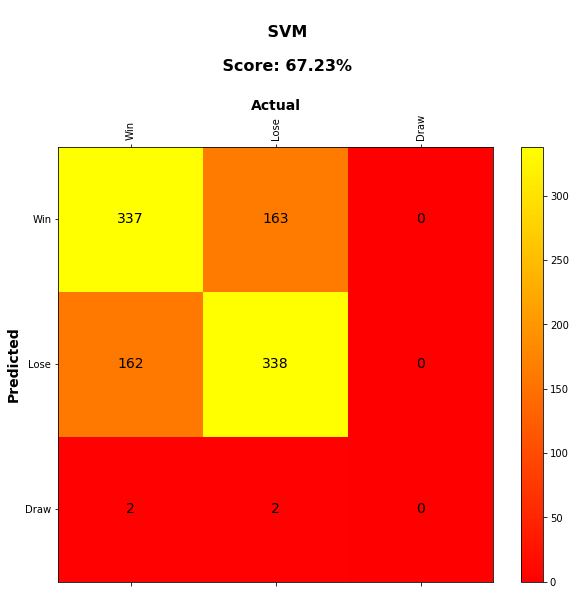

In [161]:
prep_confusion_visual(svm_df_confusion, 10, 8, 111, svm_model, 'SVM')
plt.show()

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense

In [34]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [35]:
deep_model = Sequential()
deep_model.add(Dense(units=100, activation='relu', input_dim=len(X_train.columns)))
deep_model.add(Dense(units=100, activation='relu'))
deep_model.add(Dense(units=3, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [36]:
deep_model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [37]:
deep_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               5000      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303       
Total params: 15,403
Trainable params: 15,403
Non-trainable params: 0
_________________________________________________________________


In [38]:
deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=60,
    shuffle=True,
    verbose=2
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/60
 - 1s - loss: 0.7009 - acc: 0.6297
Epoch 2/60
 - 0s - loss: 0.6426 - acc: 0.6645
Epoch 3/60
 - 0s - loss: 0.6389 - acc: 0.6647
Epoch 4/60
 - 0s - loss: 0.6338 - acc: 0.6628
Epoch 5/60
 - 0s - loss: 0.6320 - acc: 0.6650
Epoch 6/60
 - 0s - loss: 0.6247 - acc: 0.6717
Epoch 7/60
 - 0s - loss: 0.6196 - acc: 0.6758
Epoch 8/60
 - 0s - loss: 0.6148 - acc: 0.6787
Epoch 9/60
 - 0s - loss: 0.6119 - acc: 0.6819
Epoch 10/60
 - 0s - loss: 0.6058 - acc: 0.6792
Epoch 11/60
 - 0s - loss: 0.6063 - acc: 0.6807
Epoch 12/60
 - 0s - loss: 0.5979 - acc: 0.6932
Epoch 13/60
 - 0s - loss: 0.5900 - acc: 0.6930
Epoch 14/60
 - 0s - loss: 0.5862 - acc: 0.6993
Epoch 15/60
 - 0s - loss: 0.5837 - acc: 0.6990
Epoch 16/60
 - 0s - loss: 0.5768 - acc: 0.7048
Epoch 17/60
 - 0s - loss: 0.5708 - acc: 0.7068
Epoch 18/60
 - 0s - loss: 0.5686 - acc: 0.7114
Epoch 19/60
 - 0s - loss: 0.5656 - acc: 0.7065
Epoch 20/60
 - 0s - loss: 0.5597 - acc: 0.7140
Epoch 21/60
 - 0s - l

In [39]:
deep_model_loss, deep_model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose = 2)

print(
    f'''
    Deep Neural Network
    Loss: {deep_model_loss}
    Accuracy: {deep_model_accuracy}
    '''
)

 - 0s - loss: 0.9364 - acc: 0.6424

    Deep Neural Network
    Loss: 0.9364469545295989
    Accuracy: 0.642430305480957
    


In [40]:
encoded_prediction = deep_model.predict_classes(X_test_scaled)
deep_predictions = label_encoder.inverse_transform(encoded_prediction)

In [41]:
deep_accuracy = pd.DataFrame({"Prediction": list(deep_predictions), "Actual": y_test.ravel()}).reset_index(drop=True)
deep_accuracy['Correct'] = deep_accuracy.Prediction == deep_accuracy.Actual
deep_accuracy.head(15)

,Prediction,Actual,Correct
0,1,0,False
1,0,1,False
2,0,0,True
3,1,1,True
4,0,0,True
5,1,1,True
6,1,0,False
7,1,1,True
8,1,1,True
9,0,0,True


In [42]:
deep_y_actu = pd.Series(y_test.ravel(), name='Actual')
deep_y_pred = pd.Series(deep_predictions, name='Predicted')
deep_df_confusion = pd.crosstab(deep_y_actu, deep_y_pred)

In [43]:
deep_df_confusion.columns = ['Win', 'Lose']

In [44]:
deep_df_confusion.rename(index={
    deep_df_confusion.index[0]: 'Win',
    deep_df_confusion.index[1]: 'Lose',
    deep_df_confusion.index[2]: 'Draw'
}, inplace=True)
deep_df_confusion['Draw'] = 0
deep_df_confusion

,Win,Lose,Draw
Actual,,,
Win,324,176,0
Lose,179,321,0
Draw,2,2,0


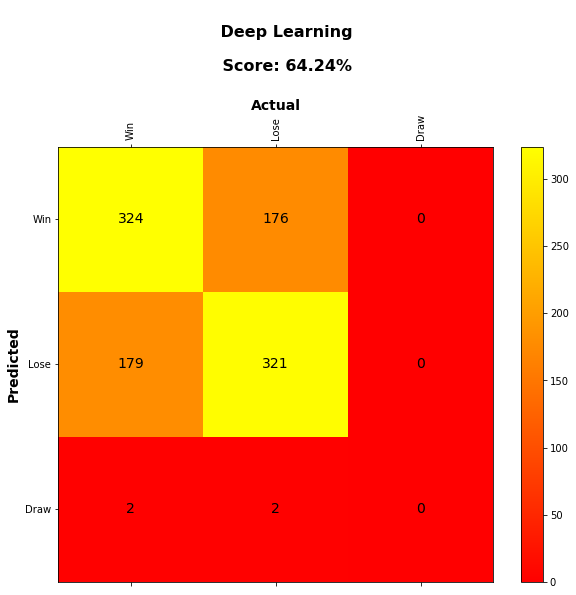

In [162]:
prep_confusion_visual(deep_df_confusion, 10, 8, 111, deep_model, 'Deep Learning')
plt.show()